In [1]:
import scipy
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

In [2]:
b = [0.5]
a = [1, -0.5]

w, h = signal.freqz(b, a)

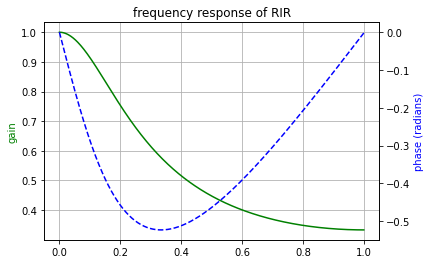

In [3]:
gain = np.abs(h)
angle = np.unwrap(np.angle(h))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of RIR')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), gain, 'g')
ax1.set_ylabel('gain', color='g')
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

plt.show()

Transfer function could be written in below's equation:
$$
H(z) = \frac{B(z)}{A(z)} = \frac{0.5}{1 - 0.5z^{-1}}
$$

And we know:

$$
z = e^{jw}
$$

To express transfer function in polar form:
$$
H(e^{jw}) = \frac{B(e^{jw})}{A(e^{jw})} = \frac{0.5}{1 - 0.5e^{-jw}}
$$

And we like to evaluate the range from $0$ to $\pi$ which is dc to nyquist, so $f_c$ became a variable.
$$
w = f_c \pi
$$

Finally we could evaluate frequency response and phase response in below's equation:
$$
H(e^{j f_c \pi}) = \frac{0.5}{1 - 0.5e^{-j f_c \pi}}
$$

$H(e^{j f_c \pi})$ is a complex number, which can be derived this complex number as a vector.

In order to calculate the distance of the vector, we could adopt pythagorean theorem to find the amplitude under certain $f_c$, which will be:

$$
\text{Amplitude}_{f_{c}} = \sqrt{(\text{H.Real}_{f_{c}})^2 + (\text{H.Imag}_{f_{c}})^2}
$$

In order to calculate the phase of the vector, we could adopt $tan()$ and $arctan()$ to find the radius under certain $f_c$, which will be:

$$
tan(\theta) = \frac{\text{H.Imag}_{f_{c}}}{\text{H.Real}_{f_{c}}} 
$$
$$
\text{Phase}_{f_{c}}(rad) = arctan(tan(\theta))
$$
$$
\text{Phase}_{f_{c}}(deg) = \frac{arctan(tan(\theta))}{2 \pi}360^{\circ}
$$

In [4]:
fc = 0.5
A = 0.5
B = 1 - 0.5 * np.exp(-np.pi * 1j * fc)
H = A / B

In [5]:
amplitude = np.sqrt(H.real ** 2 + H.imag **2)
radians = np.arctan(H.imag / H.real)
degree = np.arctan(H.imag / H.real) * 360 / (2 * np.pi)

print("adopt formular here")
print("amplitude:          ", amplitude)
print("angel in radians:   ", radians)
print("angel in degree:    ", degree)

adopt formular here
amplitude:           0.447213595499958
angel in radians:    -0.46364760900080615
angel in degree:     -26.56505117707799


In [6]:
print("adopt np tool here")
print("amplitude:          ", np.abs(H))
print("angel in radians:   ", np.angle(H))

adopt np tool here
amplitude:           0.447213595499958
angel in radians:    -0.4636476090008061


In [7]:
arr = np.random.rand(8) - 0.5
print(arr)

[ 0.1499751  -0.02756178  0.1035885  -0.23163862  0.2558616  -0.03029685
 -0.08189193 -0.35234543]


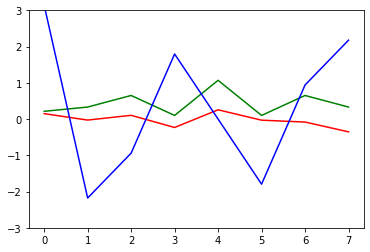

In [37]:
H = np.fft.fft(arr)
amplitude = np.abs(H)
angle = np.angle(H)

plt.ylim(-3,3)
plt.plot(arr, 'r')
plt.plot(amplitude, 'g')
plt.plot(angle, 'b')
plt.show()

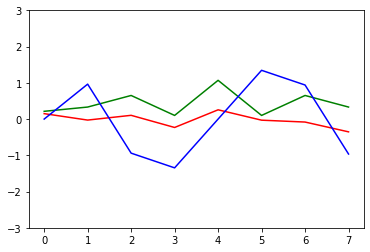

In [36]:
real = amplitude * np.cos(angle)
imag = amplitude * np.sin(angle)
H_hat = np.complex128(real + 1j* imag)

xn_synthesis = np.fft.ifft(H_hat)

plt.ylim(-3,3)
plt.plot(xn_synthesis.real, 'r')
plt.plot(np.sqrt(real**2+imag**2), 'g')
plt.plot(np.arctan(imag / real), 'b')
plt.show()